<a href="https://colab.research.google.com/github/santoshgurujula/Projects/blob/main/Netflix_Data_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from matplotlib import pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('/content/netflix_titles.csv')

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8154 entries, 0 to 8153
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8154 non-null   object
 1   type          8154 non-null   object
 2   title         8154 non-null   object
 3   director      5636 non-null   object
 4   cast          7407 non-null   object
 5   country       7351 non-null   object
 6   date_added    8145 non-null   object
 7   release_year  8154 non-null   int64 
 8   rating        8150 non-null   object
 9   duration      8150 non-null   object
 10  listed_in     8153 non-null   object
 11  description   8153 non-null   object
dtypes: int64(1), object(11)
memory usage: 764.6+ KB


***Columns with Null values are director,cast,country,date_added,rating,duration,listed_in,description***

In [8]:
#top 10 countries contributing
df['country'].value_counts()[0:11]

United States     2571
India              925
United Kingdom     366
Japan              244
South Korea        189
Canada             164
Spain              142
France             118
Mexico             105
Turkey             101
Egypt               95
Name: country, dtype: int64

In [10]:
#Load the dataset and list the 5 most popular types of genre on the platform
df['listed_in'].value_counts()[:6]

Stand-Up Comedy                                     334
Dramas, International Movies                        331
Documentaries                                       322
Comedies, Dramas, International Movies              259
Dramas, Independent Movies, International Movies    233
Kids' TV                                            212
Name: listed_in, dtype: int64

In [11]:
#Load the Dataset and categorize into TV shows and Movies and display 2 rows for each.
df_tv_shows=df[df['type']=='TV Show']

In [12]:
df_tv_shows.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [13]:
df_movies=df[df['type']=='Movie']

In [14]:
df_movies.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...


In [16]:
#Load the Dataset and find the Oldest movies
df[df['release_year']==df.release_year.min()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4250,s4251,TV Show,Pioneers: First Women Filmmakers*,NaN,NaN,NaN,"December 30, 2018",1925,TV-14,1 Season,TV Shows,This collection restores films from women who ...


In [17]:
df['duration'].value_counts()

1 Season     1715
2 Seasons     406
3 Seasons     190
90 min        135
97 min        132
             ... 
8 min           1
273 min         1
16 min          1
186 min         1
228 min         1
Name: duration, Length: 216, dtype: int64

<Axes: xlabel='release_year', ylabel='Count'>

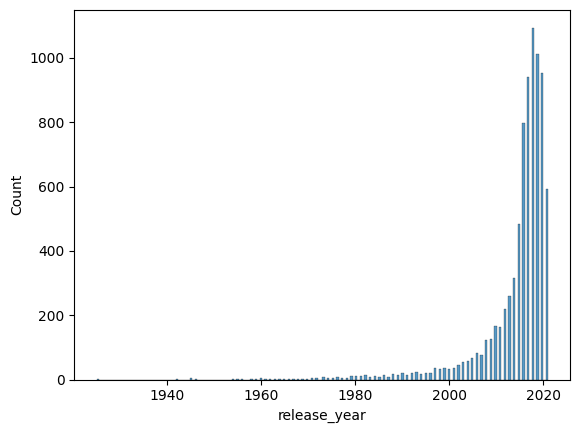

In [18]:
sns.histplot(data=df,x='release_year')

<Axes: xlabel='listed_in', ylabel='count'>

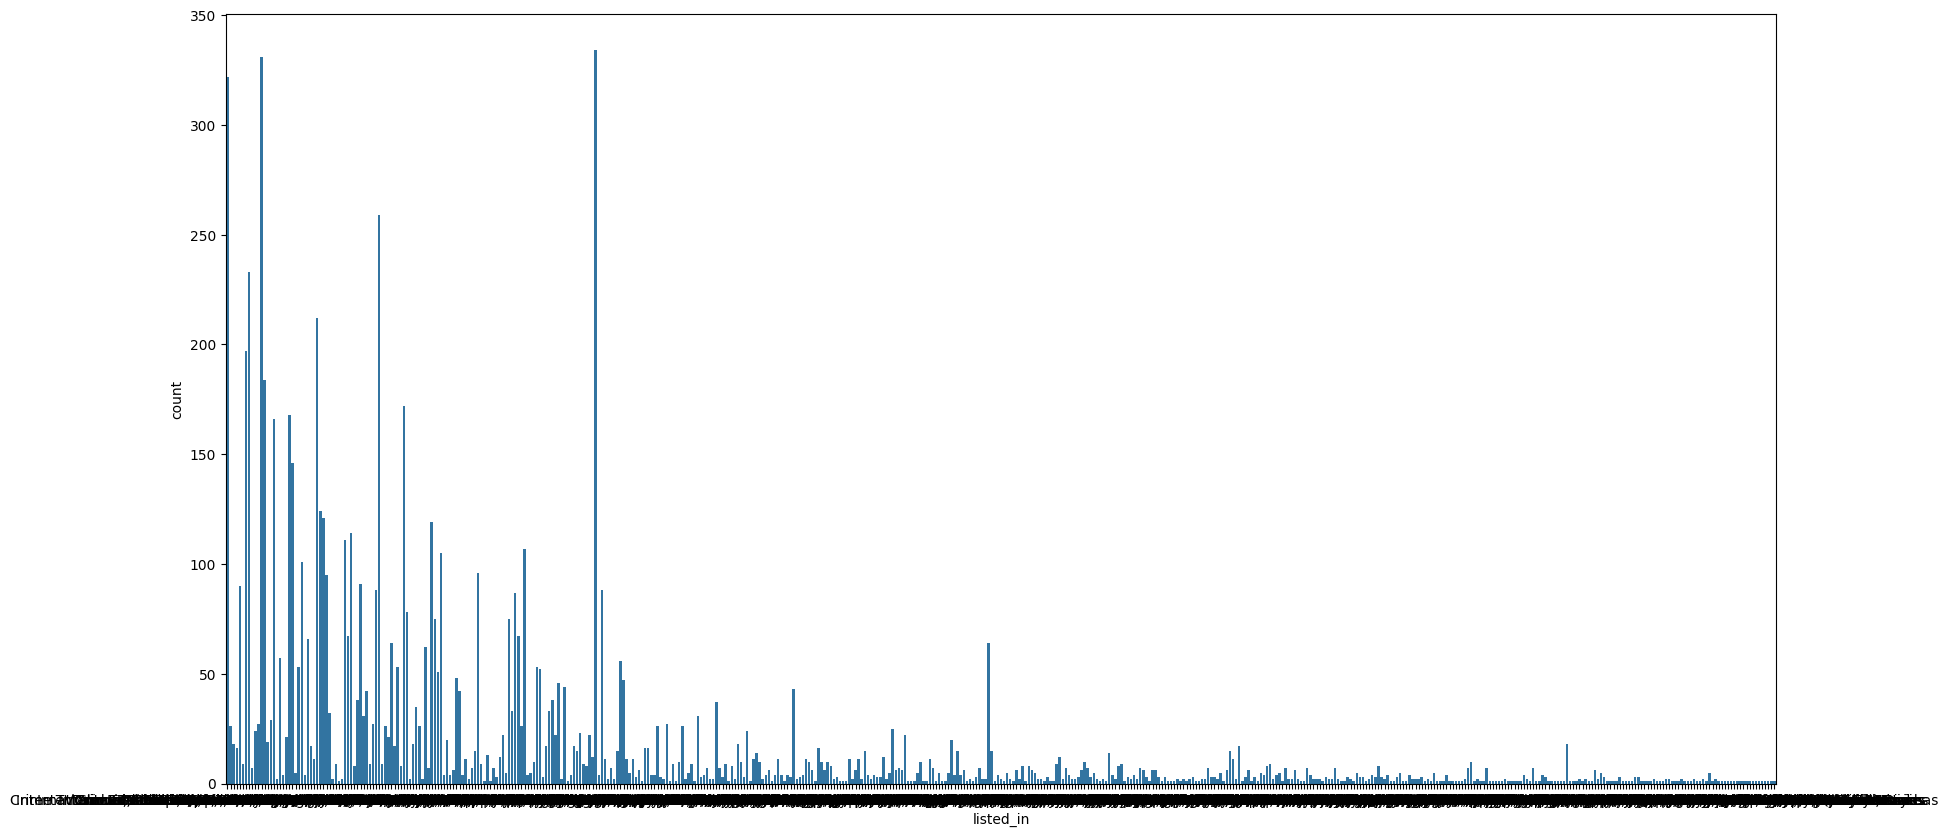

In [23]:
plt.figure(figsize=(20,10))
sns.countplot(data=df,x='listed_in')